<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Fully_Convolutional_Networks_for_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fully Convolutional Networks for Semantic Segmentation**

논문 링크: https://arxiv.org/abs/1411.4038

FCN은 Semantic segmentaion을 위해 기존의 image classification에서 우수한 성능을 보인 CNN 기반 model(AlexNet, VGG16, GoogLeNet)을 목적에 맞춰 변형한 것이다.

## **FCN 구조**

image classification model들을 생각해보면 마지막에 classification을 진행하기 위해 출력층이 fully-connected layer로 구성되어 있다. 하지만 semantic segmentation 관점에서는 fc layer가 image의 위치 정보가 사라진다는 점과 입력 크기가 고정된다는 점에서 매우 큰 단점이다.

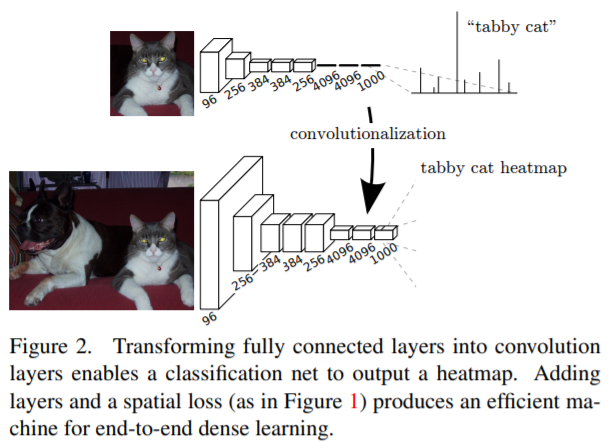

따라서 위의 그림 Figure 2와 같이 fc layer 대신에 conv layer로 대체했다.

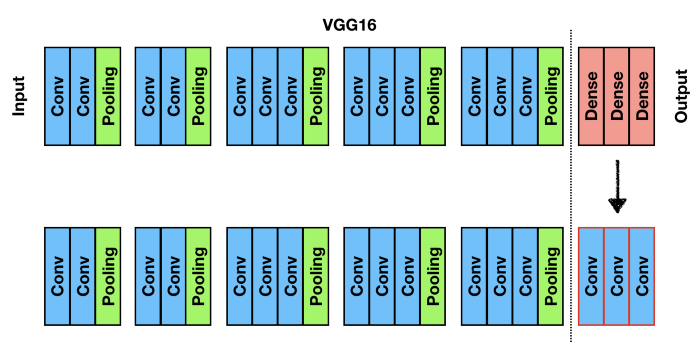

VGG16의 경우 위와 같이 마지막 3개의 layer인 dense layer(fc layer)가 conv layer로 대체된 것을 알 수 있다.

그러나 만일 이 상태로 output을 내버려두면 input image와 size가 다르기 때문에 다시 input size로 만들 방법을 고안해야한다.

### **Bilinear Interpolation**

먼저 첫번째 방법은 Bilinear Interpolation이다. 

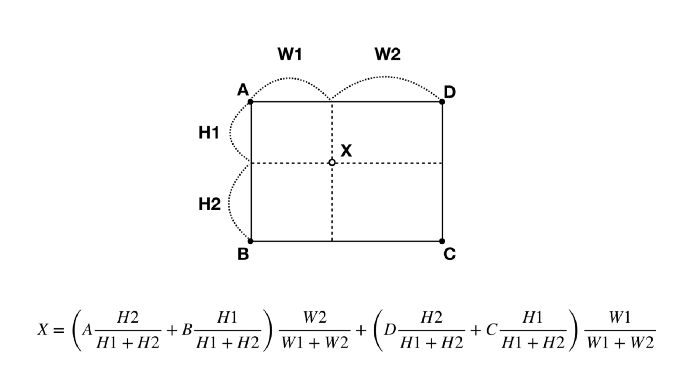

위와 같이 A, B, C, D 사이의 임의의 점 X를 추정할 수 있다.

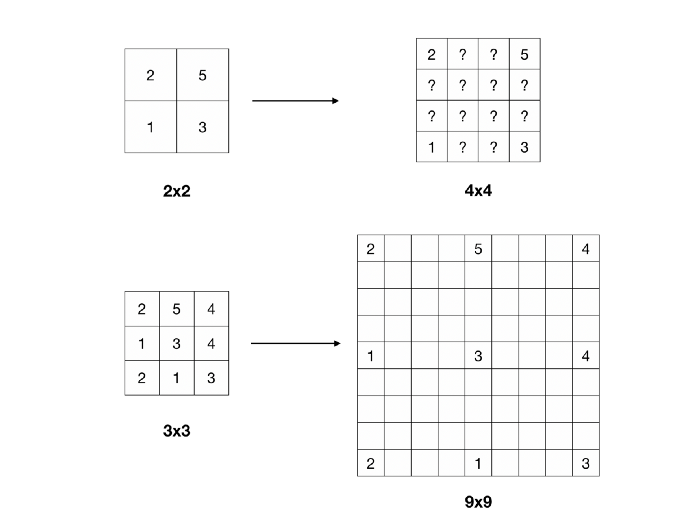

즉, 위와 같이 feature map의 빈 영역을 추정할 수 있는 것이다.

### **Backwards convolution**

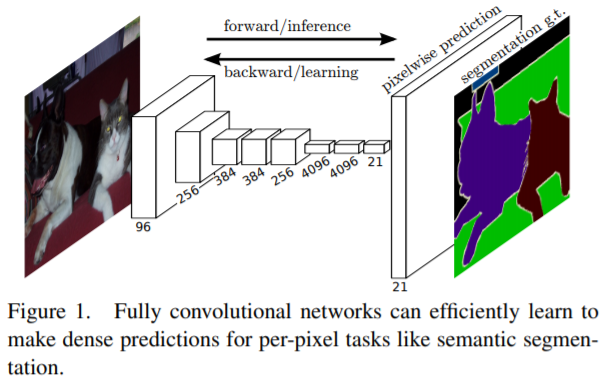

다른 방법은 위의 그림 Figure 1과 같이 마지막에 deconvolution을 사용해서 up-sampling을 하는 것이다. 하지만 이와 같이 stride가 무려 32나 되는 up-sampling 과정에서 정보가 매우 많이 손실되기 때문에 성능이 썩 좋지 못한다.

### **Skip Architecture**

Visualizing and Understanding Convolutional Networks 논문에 나와있듯이 layer가 깊어질수록 global feature를 감지하고 반대로 얕은 layer일수록 local feature를 감지한다.

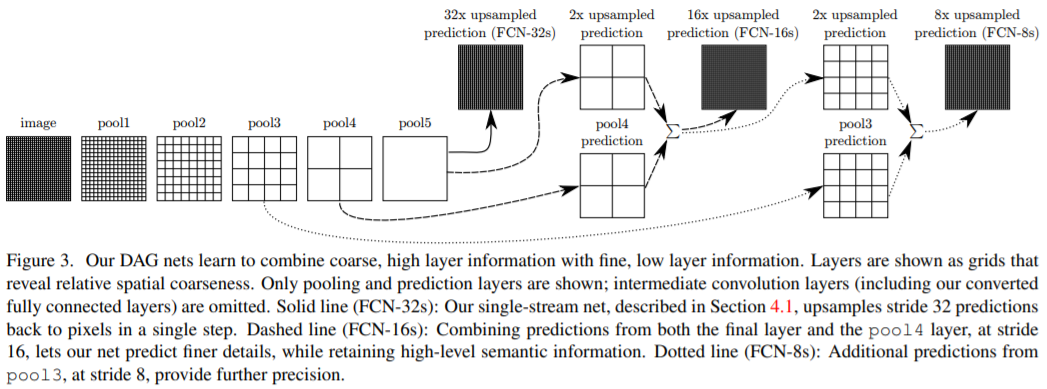

따라서 위의 그림 Figure 3과 같이 단순 deconvolution을 사용해서 up-sampling하는 것이 아닌 각 pooling의 output을 융합하여 진행한다.

## **Experiments**

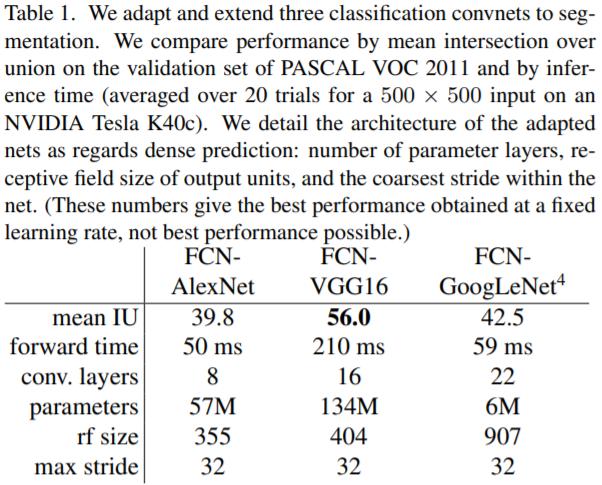

위의 표 Table 1에서는 AlexNet과 VGG 16, GoogLeNet에 대해 FCN으로 바꾸어 PASCAL VOC 2011에 대해 성능을 비교한 것이다. mean IU만 보면 VGG 16이 제일 좋지만, forward time이나 parameter 수 등 여러가지를 고려해보면 크게 압도적인 성능을 보여주는 것은 없는거 같다.

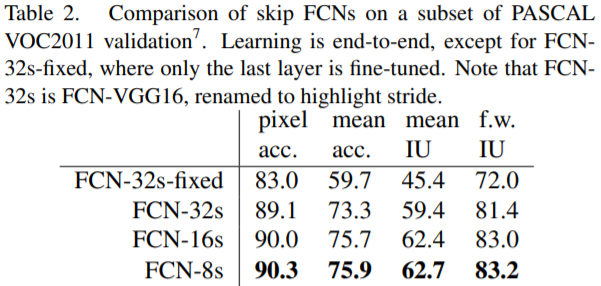

위의 표 Table 2는 Skip Architecture를 사용했을 때의 성능을 보여준다. PASCAL VOC 2011 dataset에 대해서는 FCN-8s가 가장 좋은 성능을 보여준다.

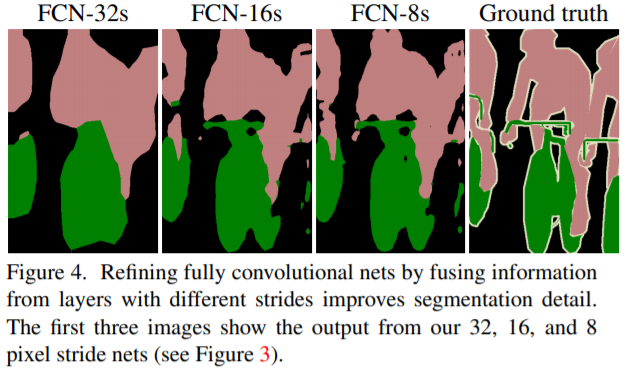

위의 그림 Figure 4를 보면 FCN-32s(no skip)은 위치 정보가 손실되기 때문에 매우 거칠며, 반대로 FCN-8(2 skips)는 위의 그림에서 가장 최상의 결과를 보여주는 것을 알 수 있다.

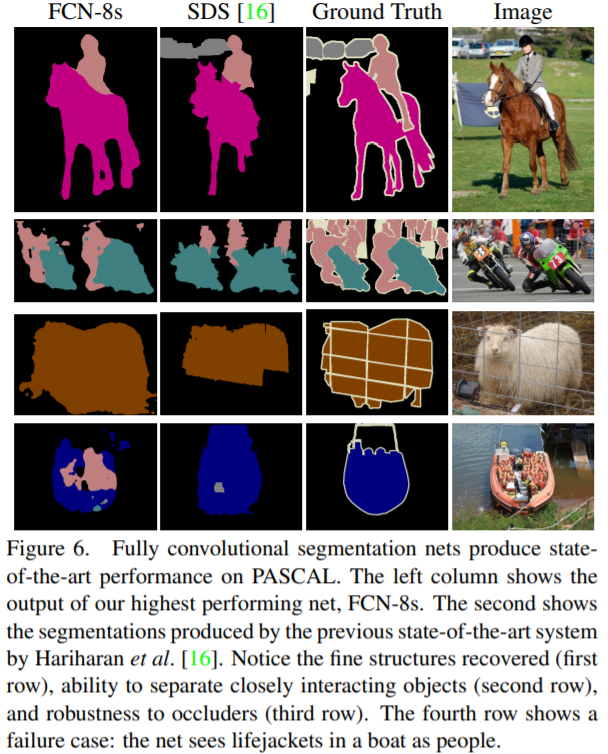

위의 그림 Figure 6에서 왼쪽 부분은 가장 좋은 성능을 보여주는 FCN-8s의 결과물을 보여준다. 그리고 맨 마지막 행인 네번째 행은 실패 사례를 보여주는데, 구명 조끼를 사람으로 인식한다.